## Investigating relationships between firearm transactions and census data

*Unveiling Patters: A comprehensive data analysis investgating firearm permit issuance with the FBI's National Instant Criminal Background Check System (NICS) and it's demographic correlations using 2016 US Census Data*

### Table of Contents
<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#wrangling">Data Wrangling</a></li>
    <li><a href="#eda">Exploratory Data Analysis</a></li>
    <li><a href="#conclusions">Conclusions</a></li>
    <li><a href="#limits">Limitations</a></li>
    <li><a href="#sources">Sources</a></li>
</ul>

<a id='intro'></a>
## Introduction

In an era defined by evolving societal dynamics and a growing awareness of public safety, the intersection of firearm activities and demographic characteristics holds immense significance. This data analysis project embarks on a journey through the datasets provided by the FBI's National Instant Criminal Background Check System (NICS) and the United States Census Bureau. By combining these diverse datasets, our mission is to uncover patterns, trends, and correlations that illuminate the complex relationship between firearm metrics and the demographic landscape of the United States. 

### Objectives

- **Growth in Background Checks per Capita**: Identify states experiencing the largest growth in background checks per capita over time.  

- **Overall Trends by Firearm Category**: Explore overall trends in background checks categorized by firearm types (handgun, long gun, and others).

### Methodology

This analysis employs a blend of statistical methods, data visualization, and exploratory data analysis techniques. The datasets are subjected to thorough cleaning, standardization, and merging to establish a robust foundation for investigation. Through hypothesis testing, correlation analysis, and category-specific trend exploration, our objective is to extract meaningful insights and construct data-driven narratives. 

### Significance

This project aspires to contribute valuable insights, elucidating the intricate dynamics between firearm activities and demographic variables. By addressing specific objectives related to per capita growth in background checks, demographic predictors of high gun registration, and nuanced trends within firearm categories, we aim to foster informed discussions and contribute to the ongoing discourse on firearm-related matters in the United States. 

Our commitment lies in delivering an analysis grounded in data integrity, statistical rigor, and an unwavering dedication to uncovering trends that can shape policies and perceptions surrounding firearm activities.

To start, I will import the necassary packages, including Pandas, Numpy and Matplotlib.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<a id='wrangling'></a>
### Data Wrangling

Before we begin exploring the data we must complete the data wrangling process. Data wrangling is the process of cleaning, transforming and organzing raw data into a format that is suitable for analysis. To begin I'll generate two pandas DataFrames: `'df_firearms'` and `'df_census'`.

In [45]:
df_firearms = pd.read_csv('gun_data.csv')
df_census = pd.read_csv('US_Census_Data.csv')

Below I will build a variable that will allow me to view the information from the dataframe and see what cleaning and manipulating will need to be done. This function stores the shape, duplication and general .info() in variables so they only need to be calucated once.

In [3]:
def display_dataframe_properties(df): 
    ''' 
    INPUT: 
    df (DataFrame) - dataframe to display properties 
    OUTPUT: 
    Print key properties of the dataframe: shape, duplicated rows count, 
    data types, and missing values for each column. 
    ''' 
    # Calculate the shape and number of duplicated rows once 
    shape_info = f'Shape: {df.shape}'
    duplicated_info = f'Duplicated rows: {sum(df.duplicated())}'
    
    # Data types and missing values for each column 
    info_str = df.info() 
    
    # Print the information 
    print(shape_info) 
    print(duplicated_info) 
    print(info_str) 
    print('\n') 

Getting a general overview of what the df.firearm dataset offers

In [4]:
df_firearms.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


As you can see the display_dataframe_properties varaible we created is working correct. We can view general .info, dataframe shape, and duplicated rows.

In [5]:
display_dataframe_properties(df_firearms)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

The NICS dataset spans from November 1998 to July 2023, encompassing over 12,000 rows of data. While the dataframe is generally well-formatted, I've identified a few issues. Most numeric columns have the dtype float, except for "multiple" and "totals." To maintain consistency, I plan to convert these two columns. The month column currently has an object dtype and should be converted to datetime. A preliminary examination of the full dataset suggests the inclusion of several Federal Districts. These entries need removal, as they do not align with our census data. A comparison of state columns in both datasets will be conducted during the exploration and cleaning of the census dataframe. 

## Converting the data types 

Here we are converting columns to the correct dtype to make merging and comparisons easier when we compare or merge later in this analysis. Also we are filling Null values with 0 for consistency sake.

In [6]:
# Combine datetime conversion and year extraction 
df_firearms['month'] = pd.to_datetime(df_firearms['month']) 
df_firearms['year'] = df_firearms['month'].dt.year 

# In-place conversion for numeric columns 
df_firearms['multiple'] = pd.to_numeric(df_firearms['multiple'], errors='coerce') 
df_firearms['totals'] = pd.to_numeric(df_firearms['totals'], errors='coerce') 

# Convert the 'year' column to datetime 
df_firearms['year'] = pd.to_datetime(df_firearms['year'], format='%Y')  

# Replace Null values with 0
df_firearms = df_firearms.fillna(0)

In [7]:
df_firearms.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year
0,2017-09-01,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019,2017-01-01
1,2017-09-01,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303,2017-01-01
2,2017-09-01,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394,2017-01-01
3,2017-09-01,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747,2017-01-01
4,2017-09-01,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506,2017-01-01


In [8]:
display_dataframe_properties(df_firearms)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   month                      12485 non-null  datetime64[ns]
 1   state                      12485 non-null  object        
 2   permit                     12485 non-null  float64       
 3   permit_recheck             12485 non-null  float64       
 4   handgun                    12485 non-null  float64       
 5   long_gun                   12485 non-null  float64       
 6   other                      12485 non-null  float64       
 7   multiple                   12485 non-null  int64         
 8   admin                      12485 non-null  float64       
 9   prepawn_handgun            12485 non-null  float64       
 10  prepawn_long_gun           12485 non-null  float64       
 11  prepawn_other              12485 non-null  float64       
 12  rede

### Now lets take a look at the df_census dataframe

In [9]:
df_census.head(3)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%


In [10]:
display_dataframe_properties(df_census)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

This dataset will need more wrangling compared to the NICS dataset. Some identified issues include: All dtypes are objects, suggesting a need for conversion to floats. The dataframe structure has States as columns and facts as rows; I propose swapping them for potential merging using State names. The facts rows will be transposed for readability and ease of use. Subsequently, unnecessary columns like 'Fact' and 'Fact Note' will be dropped, and the remaining columns will be renamed for simplicity. 

In [11]:
# transform the columns into rows and the rows into columns
df_census = df_census.transpose()
df_census.head()

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...","Persons 65 years and over, percent, April 1, 2010",...,NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
Fact Note,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Either no or too few sample observations were ...,Suppressed to avoid disclosure of confidential...,Fewer than 25 firms,Footnote on this item in place of data,Not available,Suppressed; does not meet publication standards,Not applicable,Value greater than zero but less than half uni...
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The index became the column titles and the columns became the index. 

Now I'll turn my attention to cleaning this dataframe. The 'Fact' and 'Fact Note' rows are not need so we can delete those and also drop the columns that aren't of interest

In [12]:
# Rename columns using the first row 
df_census = df_census.rename(columns=df_census.iloc[0])

# Drop unnecessary rows and set 'state' as index
df_census = df_census.drop(['Fact', 'Fact Note'], axis = 0)
df_census.index.name = 'state'

# Select specific columns of interest
select_columns = np.r_[:2, 12, 20:22, 34:36, 47:49, 62]
df_census = df_census.iloc[:, select_columns]

In [13]:
df_census.head()

,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","White alone, percent, July 1, 2016, (V2016)","Veterans, 2011-2015","Foreign born persons, percent, 2011-2015","High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","Median household income (in 2015 dollars), 2011-2015","Per capita income in past 12 months (in 2015 dollars), 2011-2015","Population per square mile, 2010"
state,,,,,,,,,,
Alabama,"4,863,300","4,780,131",69.30%,"363,170",3.50%,84.30%,23.50%,"$43,623","$24,091",94.4
Alaska,"741,894","710,249",66.10%,"69,323",7.40%,92.10%,28.00%,"$72,515","$33,413",1.2
Arizona,"6,931,071","6,392,301",83.30%,"505,794",13.50%,86.00%,27.50%,"$50,255","$25,848",56.3
Arkansas,"2,988,248","2,916,025",79.40%,"220,953",4.70%,84.80%,21.10%,"$41,371","$22,798",56
California,"39,250,017","37,254,522",72.70%,"1,777,410",27.00%,81.80%,31.40%,"$61,818","$30,318",239.1


Now lets reset the index

In [14]:
df_census = df_census.reset_index()
df_census.head()

,state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","White alone, percent, July 1, 2016, (V2016)","Veterans, 2011-2015","Foreign born persons, percent, 2011-2015","High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","Median household income (in 2015 dollars), 2011-2015","Per capita income in past 12 months (in 2015 dollars), 2011-2015","Population per square mile, 2010"
0,Alabama,"4,863,300","4,780,131",69.30%,"363,170",3.50%,84.30%,23.50%,"$43,623","$24,091",94.4
1,Alaska,"741,894","710,249",66.10%,"69,323",7.40%,92.10%,28.00%,"$72,515","$33,413",1.2
2,Arizona,"6,931,071","6,392,301",83.30%,"505,794",13.50%,86.00%,27.50%,"$50,255","$25,848",56.3
3,Arkansas,"2,988,248","2,916,025",79.40%,"220,953",4.70%,84.80%,21.10%,"$41,371","$22,798",56
4,California,"39,250,017","37,254,522",72.70%,"1,777,410",27.00%,81.80%,31.40%,"$61,818","$30,318",239.1


In [15]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column                                                                       Non-Null Count  Dtype 
---  ------                                                                       --------------  ----- 
 0   state                                                                        50 non-null     object
 1   Population estimates, July 1, 2016,  (V2016)                                 50 non-null     object
 2   Population estimates base, April 1, 2010,  (V2016)                           50 non-null     object
 3   White alone, percent, July 1, 2016,  (V2016)                                 50 non-null     object
 4   Veterans, 2011-2015                                                          50 non-null     object
 5   Foreign born persons, percent, 2011-2015                                     50 non-null     object
 6   High school graduate or higher, percent of persons a

The column names are a mess, so I'll update them for readability 

In [16]:
df_census.columns = [
    'state',
    'pop_2016',
    'pop_2010',
    'white',
    'veterans',
    'foreign born',
    'high_school_grads',
    'bachelors_grads',
    'median_income',
    'per_capita_income',
    'population_density'
]
df_census.head(2)

,state,pop_2016,pop_2010,white,veterans,foreign born,high_school_grads,bachelors_grads,median_income,per_capita_income,population_density
0,Alabama,"4,863,300","4,780,131",69.30%,"363,170",3.50%,84.30%,23.50%,"$43,623","$24,091",94.4
1,Alaska,"741,894","710,249",66.10%,"69,323",7.40%,92.10%,28.00%,"$72,515","$33,413",1.2


In [17]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   state               50 non-null     object
 1   pop_2016            50 non-null     object
 2   pop_2010            50 non-null     object
 3   white               50 non-null     object
 4   veterans            50 non-null     object
 5   foreign born        50 non-null     object
 6   high_school_grads   50 non-null     object
 7   bachelors_grads     50 non-null     object
 8   median_income       50 non-null     object
 9   per_capita_income   50 non-null     object
 10  population_density  50 non-null     object
dtypes: object(11)
memory usage: 4.4+ KB


All of our columns are still showing as an object. Lets change everything to a float besides the state column

In [18]:
# Use DataFrame indexing to select columns starting from the second column (index 1)
# Apply the provided lambda function to each cell in the selected columns
# Convert objects to float
df_census[df_census.columns[1:]] = df_census[df_census.columns[1:]].applymap(lambda x: float(x.replace('%', '')) 
    / 100. if isinstance(x, str) and '%' in x else float(x.replace('$', '').replace(',', ''))
)

In [19]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   state               50 non-null     object 
 1   pop_2016            50 non-null     float64
 2   pop_2010            50 non-null     float64
 3   white               50 non-null     float64
 4   veterans            50 non-null     float64
 5   foreign born        50 non-null     float64
 6   high_school_grads   50 non-null     float64
 7   bachelors_grads     50 non-null     float64
 8   median_income       50 non-null     float64
 9   per_capita_income   50 non-null     float64
 10  population_density  50 non-null     float64
dtypes: float64(10), object(1)
memory usage: 4.4+ KB


Lets find out which states are included in both dataframes.

In [20]:
firearms_states = df_firearms['state'].unique()
num_states_df_fa = len(firearms_states)

print(f"Unique States: {firearms_states}")
print(f"Number of Unique States: {num_states_df_fa}")

Unique States: ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Guam' 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Mariana Islands' 'Maryland' 'Massachusetts'
 'Michigan' 'Minnesota' 'Mississippi' 'Missouri' 'Montana' 'Nebraska'
 'Nevada' 'New Hampshire' 'New Jersey' 'New Mexico' 'New York'
 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Puerto Rico' 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee'
 'Texas' 'Utah' 'Vermont' 'Virgin Islands' 'Virginia' 'Washington'
 'West Virginia' 'Wisconsin' 'Wyoming']
Number of Unique States: 55


In [21]:
census_states = df_census['state'].unique()
num_states_df_cen = len(census_states)

print(f"Unique States: {census_states}")
print(f'Numer of Unique States: {num_states_df_cen}')

Unique States: ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'Florida' 'Georgia' 'Hawaii' 'Idaho' 'Illinois'
 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana' 'Maine' 'Maryland'
 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi' 'Missouri' 'Montana'
 'Nebraska' 'Nevada' 'New Hampshire' 'New Jersey' 'New Mexico' 'New York'
 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah'
 'Vermont' 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']
Numer of Unique States: 50


The firearms dataframe lists federal territories of the United States which are not found on the census dataframe. Lets list which one and then remove them

In [22]:
# Convert both lists to sets
firearms_states_set = set(firearms_states)
census_states_set = set(census_states)

# Find states that are in firearms_states but not in census_states
missing_states = firearms_states_set - census_states_set

# Print the missing states
for state in missing_states:
    print(state)

District of Columbia
Guam
Mariana Islands
Puerto Rico
Virgin Islands


In [23]:
# List of states to be removed
remove_states = ['District of Columbia', 'Guam', 'Mariana Islands', 'Puerto Rico', 'Virgin Islands']

# Filtering DataFrame to exclude specified states
df_firearms = df_firearms[~df_firearms['state'].isin(remove_states)]

In [24]:
firearms_states = df_firearms['state'].unique()
num_states_df_fa = len(firearms_states)

print(f"Unique States: {firearms_states}")
print(f"Number of Unique States: {num_states_df_fa}")

Unique States: ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'Florida' 'Georgia' 'Hawaii' 'Idaho' 'Illinois'
 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana' 'Maine' 'Maryland'
 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi' 'Missouri' 'Montana'
 'Nebraska' 'Nevada' 'New Hampshire' 'New Jersey' 'New Mexico' 'New York'
 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah'
 'Vermont' 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']
Number of Unique States: 50


I believe our dataframes are in the state we need them to start answering questions. 

Lets quickly take a look at some descriptive statistics of each dataframe using the .describe() method. This is a summary of the general numeric shape of our datasets.

In [25]:
df_firearms.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,...,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000
mean,7040.389515,113.000176,6509.303877,8575.439648,174.472423,295.059471,64.663700,4.483084,7.274009,0.074449,...,0.164317,0.006696,0.006344,3.618326,2.811278,0.249251,0.087137,0.106696,0.020881,23734.978502
std,24799.120415,2891.095370,8829.284061,9416.217660,956.508452,816.710594,633.459035,10.585770,15.997549,0.714272,...,1.793620,0.188555,0.182391,35.629404,27.160254,2.242695,0.695188,0.775415,0.194662,33437.577310
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,0.000000,0.000000,1327.250000,2778.000000,0.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6472.000000
50%,813.500000,0.000000,3622.500000,5893.000000,0.000000,151.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14050.000000
75%,5136.750000,0.000000,7987.750000,11021.500000,113.000000,328.750000,0.000000,4.000000,7.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27537.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [26]:
df_census.describe()

,pop_2016,pop_2010,white,veterans,foreign born,high_school_grads,bachelors_grads,median_income,per_capita_income,population_density
count,5.000000e+01,5.000000e+01,50.000000,5.000000e+01,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000
mean,6.448927e+06,6.163127e+06,0.793080,4.015940e+05,0.089620,0.882240,0.29012,54311.860000,28491.780000,194.962000
std,7.271769e+06,6.848463e+06,0.123359,3.831585e+05,0.060841,0.030896,0.04934,8949.529115,4103.284534,261.091465
min,5.855010e+05,5.637670e+05,0.258000,4.470800e+04,0.015000,0.818000,0.19200,39665.000000,21057.000000,1.200000
25%,1.850106e+06,1.833003e+06,0.724750,1.332715e+05,0.044000,0.856000,0.25950,47526.000000,25443.750000,44.450000
50%,4.559320e+06,4.436412e+06,0.821000,3.020175e+05,0.067500,0.888500,0.28200,52601.000000,27669.500000,98.750000
75%,7.198768e+06,6.680362e+06,0.875000,4.949490e+05,0.133750,0.908500,0.31775,60599.000000,30977.000000,209.500000
max,3.925002e+07,3.725452e+07,0.948000,1.777410e+06,0.270000,0.928000,0.40500,74551.000000,38803.000000,1195.500000


Both the `'df_firearms'` and `'df_census'` data look clean. Lets move on to the exploratory data analysis portion of this project

<a id='eda'></a>
## Exploratory Data Analysis

### Question 1: Identify states experiencing the largest growth in background checks per capita over time.

The analysis aims to identify states with notable background checks per capita trends by examining two key aspects. Firstly, it will rank states based on background checks per capita in 2010 and 2016, providing insights into initial firearm-related activity. Secondly, the focus shifts to determining the top 10 states that experienced the most substantial growth in background checks per capita from 2010 to 2016. Both analyses will be conducted using a cross-tabulation approach, akin to a pivot table, for a comprehensive exploration of trends over time.

This code calculates and aggregates the total firearm sales and background checks for the years 2010 and 2016, organizing the data by state, and presents the results in a DataFrame.

In [27]:
# Cross-tabulate the data
df_firearms['total_sales'] = df_firearms['handgun'] + df_firearms['long_gun'] + df_firearms['multiple']

# Select data for the years 2010 and 2016
firearm_10_16 = df_firearms[df_firearms['year'].isin(['2010-01-01', '2016-01-01'])]

# Group by state and year, and calculate the sum of 'totals' and 'total_sales'
firearms_total_sales = firearm_10_16.groupby(['state', 'year'], as_index=False)[['totals', 'total_sales']].sum()

# Convert the 'year' column to a numeric format (extracting the year)
firearms_total_sales['year'] = firearms_total_sales['year'].dt.year

# Display the first few rows of the result
firearms_total_sales.head()

,state,year,totals,total_sales
0,Alabama,2010,308607,258947.0
1,Alabama,2016,616947,281631.0
2,Alaska,2010,65909,60416.0
3,Alaska,2016,87647,76694.0
4,Arizona,2010,206050,161997.0


This code reshapes population data by converting it from wide to long format, extracting the year information, and presenting the results in a DataFrame.

In [28]:
# Select relevant columns for population data
population = df_census[['state', 'pop_2016', 'pop_2010']]

# Reshape the population data using the 'melt' function
population = pd.melt(population, id_vars='state', var_name='year', value_name='population')

# Extract the year from the 'year' column and convert it to numeric format
population['year'] = population['year'].str[-4:].astype(int)

# Display the first few rows of the reshaped population data
population.head()

,state,year,population
0,Alabama,2016,4863300.0
1,Alaska,2016,741894.0
2,Arizona,2016,6931071.0
3,Arkansas,2016,2988248.0
4,California,2016,39250017.0


This code merges data frames on 'state' and 'year', computes checks and sales per capita, and presents the initial rows of the resulting DataFrame.

In [29]:
# Merge the data frames on 'state' and 'year'
cross_tab = firearms_total_sales.merge(population, how='inner', on=['state', 'year'])

# Calculate checks and sales per capita
cross_tab['checks_per_capita'] = cross_tab['totals'] / cross_tab['population']
cross_tab['sales_per_capita'] = cross_tab['total_sales'] / cross_tab['population']

# Display the first few rows of the resulting data frame
cross_tab.head()

,state,year,totals,total_sales,population,checks_per_capita,sales_per_capita
0,Alabama,2010,308607,258947.0,4780131.0,0.064560,0.054172
1,Alabama,2016,616947,281631.0,4863300.0,0.126858,0.057909
2,Alaska,2010,65909,60416.0,710249.0,0.092797,0.085063
3,Alaska,2016,87647,76694.0,741894.0,0.118140,0.103376
4,Arizona,2010,206050,161997.0,6392301.0,0.032234,0.025343



This code aggregates the maximum background checks per capita for each state in the years 2010 and 2016, organizes the data into a clean structure, and renames the columns for clarity, resulting in a DataFrame showcasing per capita values for these years.

In [30]:
# Group by 'state' and 'year', then find the maximum checks per capita for each state
per_cap_cross = cross_tab.groupby(['state', 'year'])['checks_per_capita'].max().unstack()

# Reset the index and remove the axis name for a cleaner structure
per_cap_cross = per_cap_cross.reset_index().rename_axis(None, axis=1)

# Rename the columns for clarity
per_cap_cross = per_cap_cross.rename(columns={2010: 'per_capita', 2016: 'per_capita_2016'})

# Display the first few rows of the resulting per capita DataFrame
per_cap_cross.head()

,state,per_capita,per_capita_2016
0,Alabama,0.064560,0.126858
1,Alaska,0.092797,0.118140
2,Arizona,0.032234,0.060060
3,Arkansas,0.065654,0.089020
4,California,0.021914,0.060565


This code generates side-by-side horizontal bar charts comparing the per capita background checks for the top 10 states in 2010 and 2016. The DataFrame is sorted in ascending order based on per capita values, and the charts display the states with the highest per capita checks. The charts are color-coded in sky blue for 2010 and light coral for 2016, providing a visual representation of changes in per capita background checks over the specified years.

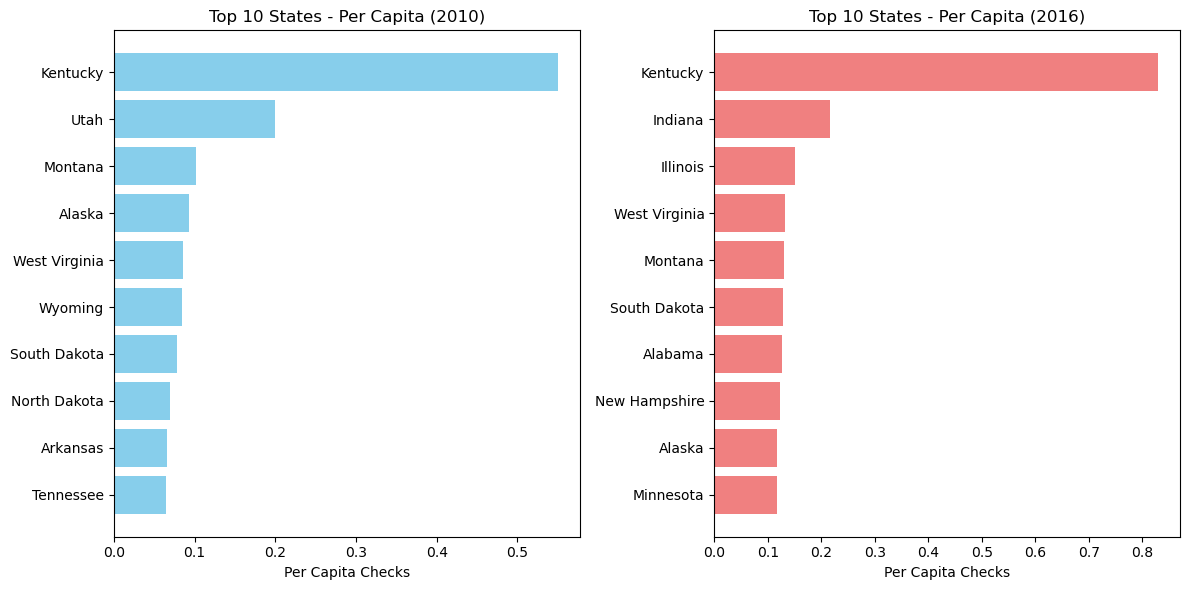

In [31]:
# Sort the DataFrame by per capita values in 2010 and select the top 10
top_10_2010 = per_cap_cross.sort_values(by='per_capita', ascending=True).tail(10)

# Sort the DataFrame by per capita values in 2016 and select the top 10
top_10_2016 = per_cap_cross.sort_values(by='per_capita_2016', ascending=True).tail(10)

# Create subplots for side-by-side bar charts
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 6))

# Bar chart for top 10 states in 2010
axes[0].barh(top_10_2010['state'], top_10_2010['per_capita'], color='skyblue')
axes[0].set_title('Top 10 States - Per Capita (2010)')
axes[0].set_xlabel('Per Capita Checks')

# Bar chart for top 10 states in 2016
axes[1].barh(top_10_2016['state'], top_10_2016['per_capita_2016'], color='lightcoral')
axes[1].set_title('Top 10 States - Per Capita (2016)')
axes[1].set_xlabel('Per Capita Checks')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


This chart computes the change in per capita background checks from 2010 to 2016, identifies the top 10 states with the highest growth, and creates a horizontal bar chart to visually represent this change. The chart displays the states in descending order based on growth, and the bars are colored in salmon, providing a clear illustration of the states experiencing the most significant increases in per capita background checks over the specified period.

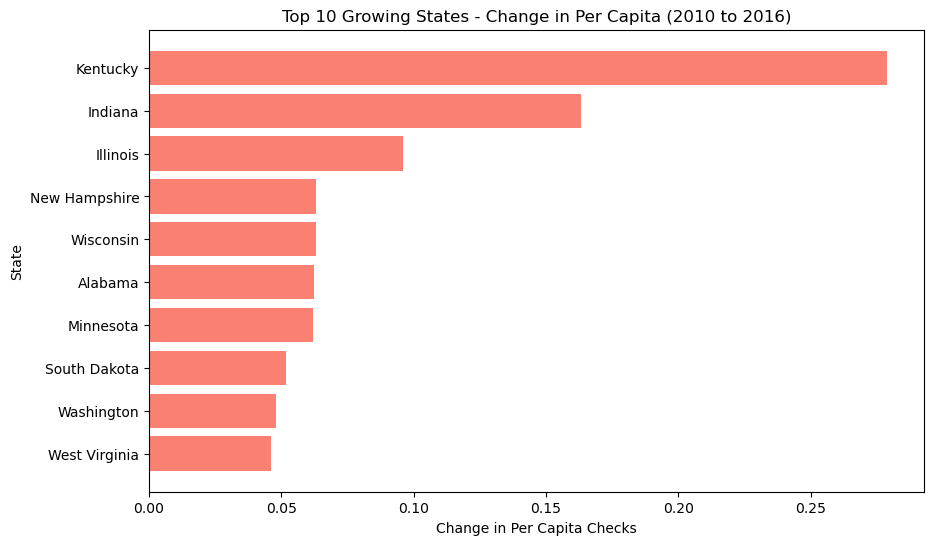

In [32]:
# Calculate the change in per capita values from 2010 to 2016
per_cap_cross['growth'] = per_cap_cross['per_capita_2016'] - per_cap_cross['per_capita']

# Select the top 10 growing states and sort in descending order
top_10_growing = per_cap_cross.sort_values(by='growth', ascending=True).tail(10)

# Create a bar chart for the top 10 growing states
plt.figure(figsize=(10, 6))
plt.barh(top_10_growing['state'], top_10_growing['growth'], color='salmon')
plt.title('Top 10 Growing States - Change in Per Capita (2010 to 2016)')
plt.xlabel('Change in Per Capita Checks')
plt.ylabel('State')

# Show the plot
plt.show()

As you can see Kentucky had the highest growth rate from 2010 to 2016, with Indiana and Illinois showing a noticiable spike within the time frame. 

### Question 2: Explore overall trends in background checks categorized by firearm types (handgun, long gun, and others)

I am interested in examining the trends for each distinct category, focusing on handguns, long guns, and multiple-gun background checks. I will generate views on both a yearly and monthly basis.

Filtering rows in the dataframe to include only those where the year column falls in the range we are looking for. 

In [33]:
# Select rows between date ranges
firearms_years = df_firearms[df_firearms['year'].between('1999-01-01', '2016-12-31')]

This code creates a yearly pivot table summarizing the sum of handgun, long gun, and multiple-gun background checks, and then resets the index for clarity.

In [34]:
# Use pivot_table to pivot the data and calculate the sum for each year
firearms_checks_yearly = firearms_years.pivot_table(values=['handgun', 'long_gun', 'multiple'], index='year', aggfunc='sum')

# Reset the index to have a cleaner DataFrame
firearms_checks_yearly = firearms_checks_yearly.reset_index()

# Display the result
firearms_checks_yearly.head()

,year,handgun,long_gun,multiple
0,1999-01-01,2532511.0,5216320.0,103669
1,2000-01-01,2187581.0,4778762.0,95681
2,2001-01-01,2161166.0,4941982.0,96984
3,2002-01-01,1838239.0,4407866.0,92892
4,2003-01-01,1844597.0,4381438.0,99034


This code generates a line plot illustrating the annual background checks for handgun, long gun, and multiple gun types, with enhanced visualization features.

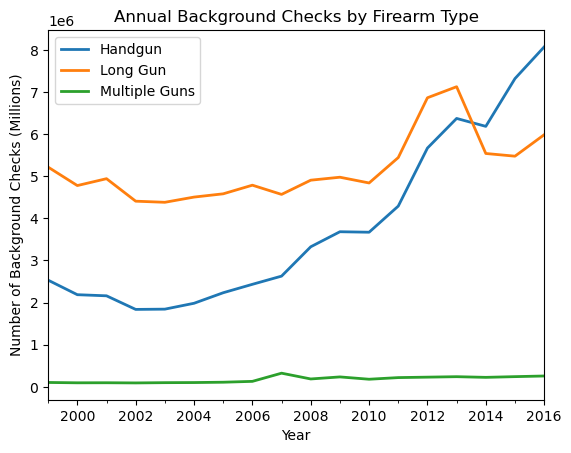

In [35]:
# Plot the data
firearms_checks_yearly.plot(x='year', y=['handgun', 'long_gun', 'multiple'], linewidth=2)

# Enhance visualization
firearm_types = ['Handgun', 'Long Gun', 'Multiple Guns']
plt.legend(firearm_types, loc='upper left')
plt.title('Annual Background Checks by Firearm Type')
plt.xlabel('Year')
plt.ylabel('Number of Background Checks (Millions)')

# Display the plot
plt.show()

The plot illustrates the annual trends in background checks for various firearm types over the designated years, providing insights into the fluctuations and patterns in background check activities. Notably, long gun background checks consistently surpassed handgun checks until 2014 when handguns surpassed them. Multiple gun checks remained relatively consistent throughout the specified time period.

This code creates a monthly pivot table summarizing the sum of handgun, long gun, and multiple-gun background checks, and then resets the index for clarity.

In [36]:
# Aggregate monthly background checks for different firearm types using pivot_table
firearms_checks_monthly = df_firearms.pivot_table(values=['handgun', 'long_gun', 'multiple'], index='month', aggfunc='sum')

# Display the first few rows of the result
firearms_checks_monthly.head()

,handgun,long_gun,multiple
month,,,
1998-11-01,6858.0,11908.0,275
1998-12-01,212737.0,570774.0,8436
1999-01-01,184192.0,309818.0,7494
1999-02-01,232172.0,352344.0,9221
1999-03-01,240680.0,376686.0,9529


This code generates a line chart illustrating monthly background checks for handgun, long gun, and multiple gun types, with enhanced visualization features.

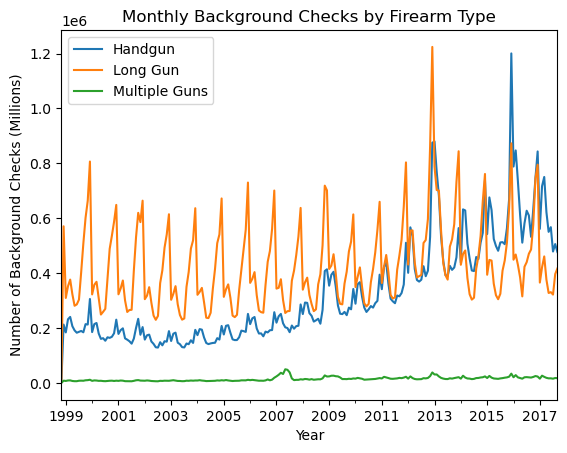

In [37]:
# Plot the data
firearms_checks_monthly.plot()

# Enhance visualization
firearm_types = ['Handgun', 'Long Gun', 'Multiple Guns']
plt.legend(firearm_types, loc='upper left')
plt.title('Monthly Background Checks by Firearm Type')
plt.xlabel('Year')
plt.ylabel('Number of Background Checks (Millions)')

# Display the plot
plt.show()


Handguns and long guns share recurrent cycles each year, unlike multiple-gun transactions, which show less distinct trends.

<a id='conclusions'></a>
## Conclusion

This data analytics investigation into the intersection of firearm activities and demographic characteristics in the United States reveals compelling insights, shedding light on the complex dynamics within this realm.

### Key Findings:

**1. Overall Trends in Background Checks and Gun Sales:**
   - Both annual background checks and gun sales exhibited a consistent upward trend from 2010 to 2016, with annual increases of almost 20 million and 8 million, respectively.
   - Cyclical fluctuations within each year were observed, typically peaking around the end of each year.

**2. Firearm Categories and Cyclical Patterns:**
   - Historically, long guns surpassed handguns in background checks until 2014 when handguns experienced a significant spike, surpassing long guns.
   - Both handgun and long gun background checks displayed cyclical patterns within each year, with peaks around year-end. Multiple-gun background checks exhibited less pronounced cyclical trends.

**3. Per Capita Measures and State Variations:**
   - The per capita distribution of handgun background checks notably increased from 2010 to 2016, while differences for long gun and multiple-gun checks were less pronounced.
   - Kentucky consistently led in background checks per capita, maintaining its top position from 2010 to 2016. The state also demonstrated remarkable growth, outpacing others with an increase of more than 0.25 checks per capita.

### Top States and Growth Leaders:

The states consistently in the top 10 in both 2010 and 2016 were Kentucky, Montana, Alaska, West Virginia, and South Dakota. Notably, Kentucky, West Virginia, and South Dakota were not only top performers but also demonstrated substantial growth in background checks per capita.

### Overall Trend Analysis:

The overall trend in background checks and gun sales increased since the data was first collected. The increase was not steady within each year, showing cyclical rises and falls based on the time of the year, with peaks around the end of each year.

### Firearm Category Dynamics:

The number of long gun background checks historically surpassed handgun checks until 2014 when handguns surpassed long guns. Handguns increased at a faster rate than long guns, while multiple-gun background checks remained relatively steady.

### State Comparisons:

In 2010, Kentucky had the highest background checks per capita, leading by about 0.3 checks per capita. In 2016, Kentucky maintained its top position, leading by about 0.6 checks per capita.


### Overall Conclusion:

This analysis significantly contributes to the ongoing discourse on firearm-related matters, providing valuable insights into the intricate dynamics between firearm activities and demographic variables. The findings inform discussions on per capita growth, state variations, and category-specific trends, fostering a data-driven approach to policy and public safety considerations. The commitment lies in delivering insights grounded in data integrity and statistical scrutiny, shaping policies and perceptions surrounding firearm activities in the United States.

<a id='limits'></a>
## Limitations

### Limiation 1:

The census data's limitation lies in its availability for specific years, like the percentage of white individuals in 2016 or the number of veterans in 2011-2015. More years would enhance comparisons, like correlating background checks per capita with white and veteran populations in 2016. Extending the data range would enable analyses over longer periods, offering insights into changes since 1998 when gun data was first collected. Additionally, having a broader census dataset would provide more accurate denominators for metrics, addressing issues like using 2010 as a denominator for 2011-2015.

### Limitation 2:

There are a few chunks of inconsistant data that were held back for confidential reasons. For example:

In [40]:
row_42 = pd.read_csv('US_Census_Data.csv').iloc[42].head(15) 
row_42

Fact           Total manufacturers shipments, 2012 ($1,000)
Fact Note                                               (c)
Alabama                                         124,809,759
Alaska                                                    D
Arizona                                          51,243,473
Arkansas                                         62,712,925
California                                      512,303,164
Colorado                                         50,447,098
Connecticut                                      55,160,095
Delaware                                         22,597,384
Florida                                          96,924,106
Georgia                                         155,836,792
Hawaii                                                    D
Idaho                                            20,201,432
Illinois                                        281,037,755
Name: 42, dtype: object

In the states Alaska and Hawaii, some data points are labeled as 'D' which means 'Supressed to avoid disclosure of confidential information'. 

<a id='sources'></a>
## Sources

- [NICS Firearm Background Checks](https://www.fbi.gov/file-repository/nics_firearm_checks_-_month_year_by_state_type.pdf/view)
- [Pandas applymap() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.applymap.html)
- [Transpose](https://stackoverflow.com/questions/24412510/transpose-pandas-dataframe)
- [Plotting a Dataframe](https://stackoverflow.com/questions/51580588/plotting-pandas-dataframe-with-matplotlib)